## Example 1: Processing NWChem outputs

In this example, we will process outputs of NWChem calculations to determine the Huang-Rhys parameters and the corresponding intra-molecular reorganization energy of a BPEA [9,10-Bis(phenylethynyl)anthracene] molecule under excitation from the S$_0$ to the S$_1$ state.

We will use the following outputs of NWChem calculations:

(i) Geometry optimization of ground-state BPEA followed by a frequency analysis ('./nwchem_outs/S0_opt.out')

(ii) Geometry optimization of the excited state BPEA ('./nwchem_outs/S1_opt.out')

(iii) Vertical excited state energy calculation to verify the accuracy of the obtained Huang-Rhys parameters ('./nwchem_outs/S1_vertical.out')


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vibron.nwchem_utils import nwread, nwdushinsky
from vibron import Molecule
from vibron.utils import units


We first extract vibrational mode frequencies from the ground-state calculation (in eV):

In [2]:
vib_modes = nwread.read_frequencies('./nwchem_outs/S0_opt.out')

We then calculate and plot the Huang-Rhys parameters for each of the modes for the electronic transition in question: 

Text(0, 0.5, 'Huang-Rhys parameter')

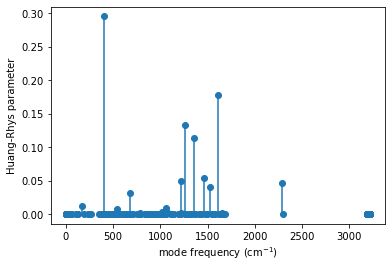

In [3]:
HR_parameters = nwdushinsky.huang_rhys('./nwchem_outs/S0_opt.out','./nwchem_outs/S1_opt.out')

plt.stem(vib_modes*units.eV2wavenumber, HR_parameters, use_line_collection=True, basefmt=' ')
plt.xlabel('mode frequency (cm$^{-1}$)')
plt.ylabel('Huang-Rhys parameter')

To assess the accuracy of this calculation, we can calculate the corresponding reorganization energy and compare it to the reorganization energy obtained using a two-point method.

We first create a Molecule object and calculate the roerganization energy using the above Huang-Rhys parameters:

In [4]:
BPEA = Molecule(vib_modes=vib_modes, hr_parameters=HR_parameters)

lambda_HR = BPEA.inner_reorganization()

print(f"Inner-reorganization energy from HR parameters: {lambda_HR:.4f} eV")

Inner-reorganization energy from HR parameters: 0.1343 eV


We then calculate the reorganization energy as the difference between the energy of the S$_1$ state in the S$_0$ geometry and the energy of the S$_1$ geometry minimum:

In [5]:
lambda_2point = nwread.read_tddft('./nwchem_outs/S1_vertical.out') - nwread.read_optenergy('./nwchem_outs/S1_opt.out') 
print(f"Inner-reorganization energy from the 2-point method: {lambda_2point:.4f} eV")

Inner-reorganization energy from the 2-point method: 0.1356 eV


Ideally, the two values should be identical assuming the harmonic approximation etc. In practice, they can deviate a little. Here, they are different by:

In [6]:
print(f"Inner-reorganization energy difference: {100*np.abs(1 - lambda_HR/lambda_2point):.2f}%")

Inner-reorganization energy difference: 0.97%
